In [2]:
"""导入必要的库"""
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [13]:
"""根据真实的参数 w, b 生成人工特征 X, 和对应的 y，向 y 中加入噪声 """
def synthetic_data(w, b, num_examples):
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape(num_examples, 1)

In [19]:
true_w = torch.tensor((1.1, -0.9, 1))
true_b = 3.8
X, y = synthetic_data(true_w, true_b, 1000)

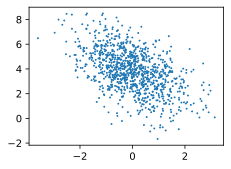

In [20]:
d2l.set_figsize()
d2l.plt.scatter(X[:,1].detach().numpy(), y.detach().numpy(),1)

In [31]:
"""生成数据迭代器，从每次从原始数据集中随机抽取 batch_size 个随机样本"""
def data_iter(batch_size, X, y):
    num_examples = len(X)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = indices[i:min(i+batch_size, num_examples)]
        yield X[batch_indices], y[batch_indices]

In [32]:
for X, y in data_iter(10, X, y):
    print(X, '\n', y)
    break

tensor([[ 1.4097, -1.7055,  0.6579],
        [ 0.4747, -0.3419,  1.5101],
        [ 2.1109, -1.0287,  1.0003],
        [-1.0946,  0.2209, -0.7806],
        [-1.0558, -0.8748, -0.0119],
        [ 0.4367, -1.1483, -1.5549],
        [-0.3972,  0.4190,  0.2559],
        [-1.4313, -0.0624,  1.6671],
        [-0.6575,  0.2360,  0.6832],
        [-1.6242,  0.8405, -0.4257]]) 
 tensor([[7.5323],
        [6.1542],
        [8.0417],
        [1.6243],
        [3.4055],
        [3.7635],
        [3.2509],
        [3.9536],
        [3.5393],
        [0.8234]])


In [50]:
"""定义神经网络为单层感知机（也就是线性回归）"""
def linear_regression(X, w, b):
    return torch.matmul(X, w) + b

In [51]:
"""定义损失函数为均方误差"""
def squared_loss(y_hat, y):
    return ((y-y_hat.reshape(y.shape))**2).sum() / 2 / len(y)

In [52]:
"""定义优化方法为随机梯度下降"""
def sgd(params, lr):
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad
            param.grad.zero_()

In [70]:
"""设定训练的初始化参数和超参数"""
lr = 0.5
num_epochs = 10
net = linear_regression
loss = squared_loss
batch_size = 10
w = torch.normal(0, 0.01, size=(3,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, X, y):
        l = loss(net(X, w, b), y)
        l.backward()
        sgd([w,b], lr)
    with torch.no_grad():
        train_l = loss(net(X, w, b), y)
        print(f'epoch {epoch+1}, loss {float(train_l.mean()):f}')

epoch 1, loss 1.038180
epoch 2, loss 0.265326
epoch 3, loss 0.135072
epoch 4, loss 0.094625
epoch 5, loss 0.074083
epoch 6, loss 0.060503
epoch 7, loss 0.050291
epoch 8, loss 0.042121
epoch 9, loss 0.035395
epoch 10, loss 0.029786


In [71]:
w, b

(tensor([[ 0.8330],
         [-1.3458],
         [ 1.0905]], requires_grad=True),
 tensor([3.5220], requires_grad=True))